In [1]:
#Visualise classification report

#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
from tabulate import tabulate

In [5]:
#Load results from csv
def load_results_from_csv(csv_file):
    """
    Load model results from a CSV file.
    
    Parameters:
    - csv_file: Path to the CSV file containing model results
    
    Returns:
    - DataFrame containing the model results
    """
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file, index_col=0)
        
        # For single model results (one row)
        if len(df) == 1:
            return df.iloc[0].to_dict()
        # For multiple models (return first model if no model_name specified)
        else:
            return df.iloc[0].to_dict()
    except Exception as e:
        raise Exception(f"Error loading CSV file: {str(e)}")

model_results = load_results_from_csv("model_results.csv")

In [ ]:
def visualise_model_results(model_results, model_name="Model", output_file="model_results_visualization.png"):
    """
    Visualise model results with a table and graphs.
    
    Parameters:
    - model_results: A dictionary with metrics (Accuracy, Precision, Recall, F1 Score, Training Time)
    - model_name: Name of the model (for display purposes)
    - output_file: Filename to save the visualisation
    """
    # Create a DataFrame for easier manipulation
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [
        model_results.get('Accuracy', model_results.get('accuracy', 0)), 
        model_results.get('Precision', model_results.get('precision', 0)),
        model_results.get('Recall', model_results.get('recall', 0)),
        model_results.get('F1 Score', model_results.get('f1_score', model_results.get('F1-Score', 0)))
    ]
    
    df = pd.DataFrame({
        'Metric': metrics,
        'Value': values
    })
    
    # Display table
    print(f"\n=== {model_name} Performance Metrics ===")
    table = [['Metric', 'Value']] + [[metric, f"{value:.4f}"] for metric, value in zip(metrics, values)]
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    # Display training time separately
    training_time = model_results.get('Training Time', model_results.get('training_time', 0))
    print(f"\nTraining Time: {training_time:.4f} seconds")
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar chart for performance metrics
    ax1.bar(df['Metric'], df['Value'], color='skyblue')
    ax1.set_ylim(0, 1.0)
    ax1.set_title(f'{model_name} Performance Metrics')
    ax1.set_ylabel('Score')
    ax1.grid(axis='y', linestyle='--', alpha=0.3)
    for i, v in enumerate(df['Value']):
        ax1.text(i, v + 0.02, f'{v:.4f}', ha='center')
    
    # Pie chart for metric comparison
    ax2.pie(df['Value'], labels=df['Metric'], autopct='%1.1f%%', startangle=90, 
            colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    ax2.set_title('Relative Performance Metrics')
    
    plt.suptitle(f"{model_name} Evaluation Results", fontsize=16)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    
    print(f"\nVisualization saved as '{output_file}'")


=== Decision_Tree Performance Metrics ===
+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  |    0.73 |
+-----------+---------+
| Precision |    0    |
+-----------+---------+
| Recall    |    0.33 |
+-----------+---------+
| F1 Score  |    0    |
+-----------+---------+

Training Time: 1.2200 seconds


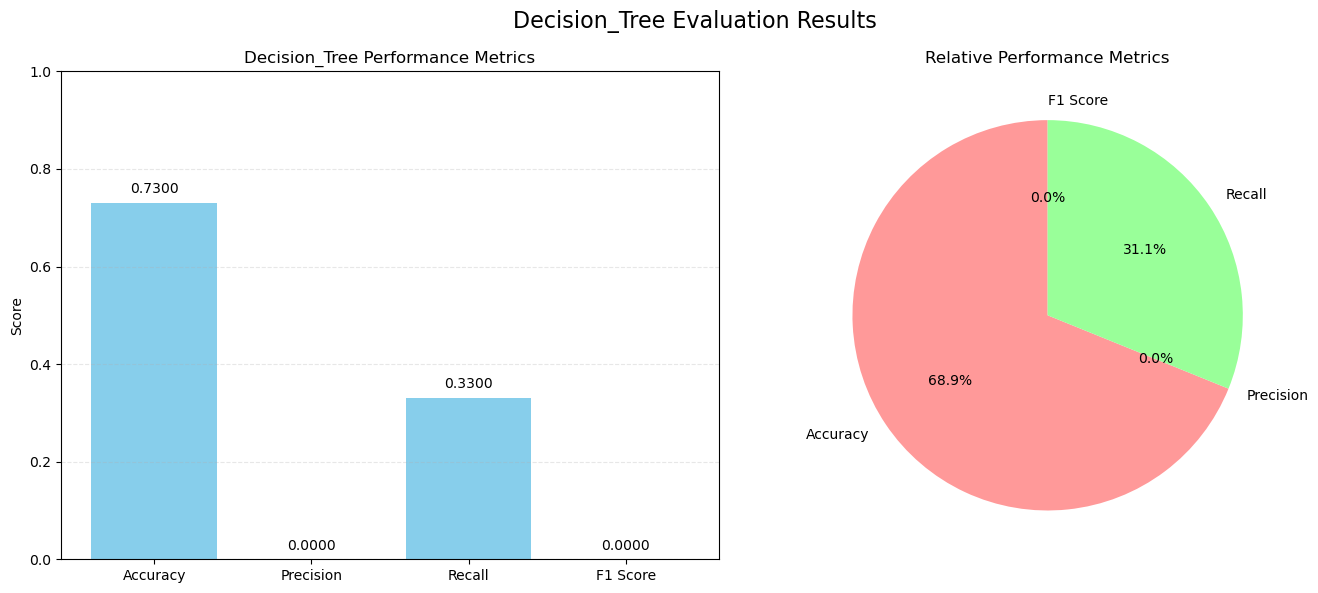


Visualization saved as 'model_results_visualization.png'


In [ ]:
visualise_model_results(model_results, model_name="Decision_Tree", output_file="model_results_visualisation.png")

usage: ipykernel_launcher.py [-h] [--model MODEL] [--output OUTPUT] csv_file
ipykernel_launcher.py: error: the following arguments are required: csv_file


SystemExit: 2

C:\Users\kiarn\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
